<a href="https://colab.research.google.com/github/AbigailBojorquez/Edible-Mushrooms/blob/main/Project_2_(part_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
# Importing Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [192]:
# Set display options
# Display all columns
pd.set_option('display.max_column', None)
# Display full width of field
pd.set_option('display.max_colwidth', None)
# Display table across entire available view
pd.set_option('display.width', -1)
# Display all rows
pd.set_option('display.max_rows', None)

In [193]:
# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram in a Jupyter lab or notebook context
set_config(display= 'diagram') # {‘text’, ‘diagram’}, default=None

## First Choice: Dataset 1

In [194]:
# Loading Data
path = '/content/drive/MyDrive/Coding Dojo/Project 2/Data/mushrooms.csv'
df = pd.read_csv(path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [196]:
# Check for duplicates and missing values
print('Missing data:\n', df.isna().sum())
print('\n')
print('Duplicates:', df.duplicated().sum())

Missing data:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


Duplicates: 0


In [197]:
df_ml = df.copy()

In [198]:
df_ml["class"] = df_ml["class"].replace("p", 1)
df_ml["class"] = df_ml["class"].replace("e", 0)

In [199]:
y = df_ml['class']
X = df_ml.drop(columns = 'class')

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [200]:
# We do still have categorical data that needs to be converted
cat_feat = make_column_selector(dtype_include = 'object')


# Instanntiat the column transformers
encoder = OneHotEncoder(sparse=False, handle_unknown= 'ignore')


# Modeling 

In [201]:
# I am using this code so that in the future it is easier to just use this code and it will run accuracy, recall and precision. 
def metrics(pred,y):
  print(accuracy_score(y,pred))
  print(recall_score(y,pred))
  print(precision_score(y,pred))

## Logistic Regression Model 

In [202]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(encoder, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.8872476612506155,
 0.001: 0.9261447562776958,
 0.01: 0.9857213195470211,
 0.1: 0.999015263417036,
 1: 1.0,
 10: 1.0,
 100: 1.0,
 1000: 1.0}

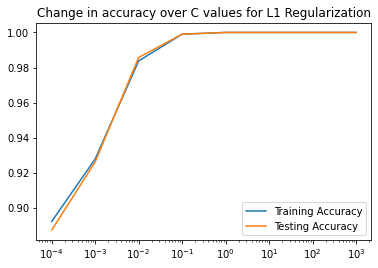

In [203]:
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for L1 Regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')

> This graph is showing the change in accuracy using the L1 regression. This simply restricts the size of coefficients. 

> Logistic Regression metrics

In [212]:
%%time
non_pca_log_reg_pipe= make_pipeline (encoder, LogisticRegression())
non_pca_log_reg_pipe.fit(X_train, y_train)
NPLR_Train_preds = non_pca_log_reg_pipe.predict(X_train)
NPLR_Test_preds = non_pca_log_reg_pipe.predict(X_test)
metrics(NPLR_Train_preds,y_train)
print()
metrics(NPLR_Test_preds,y_test)

1.0
1.0
1.0

1.0
1.0
1.0
CPU times: user 332 ms, sys: 155 ms, total: 487 ms
Wall time: 272 ms


In [213]:
%%time
pca_log_reg_pipe= make_pipeline (encoder, PCA(0.95), LogisticRegression())
pca_log_reg_pipe.fit(X_train, y_train)
PLR_Train_preds = pca_log_reg_pipe.predict(X_train)
PLR_Test_preds = pca_log_reg_pipe.predict(X_test)
metrics(PLR_Train_preds,y_train)
print()
metrics(PLR_Test_preds,y_test)

0.9937633349745609
0.9924786324786324
0.9945186707776635

0.9970457902511078
0.9969727547931383
0.9969727547931383
CPU times: user 397 ms, sys: 143 ms, total: 540 ms
Wall time: 316 ms


- For Logistic Regression the non pca pipeline was the fastest model that took 487ms. This was 53ms faster than the pca pipline. 

## Random Forest Classifier Model




 

In [205]:
# Make Random FOrest Classifier model
%%time
rf = RandomForestClassifier(random_state=42)  
rf_pipline = make_pipeline(encoder, rf)
rf_pipline.fit(X_train, y_train)
# Getting the estimated gepth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]


CPU times: user 414 ms, sys: 71 ms, total: 485 ms
Wall time: 410 ms


In [206]:
%%time
rf_for_train_preds = rf_pipline.predict(X_train)
rf_for_test_preds = rf_pipline.predict(X_test)

metrics (rf_for_train_preds, y_train)
metrics (rf_for_test_preds, y_test)
#non PCA

1.0
1.0
1.0
1.0
1.0
1.0
CPU times: user 175 ms, sys: 0 ns, total: 175 ms
Wall time: 178 ms


> Random Forest Classifier metrics

In [207]:
%%time
pca_Random_Forest_pipe= make_pipeline (encoder, PCA(0.95), RandomForestClassifier())
pca_Random_Forest_pipe.fit(X_train, y_train)


CPU times: user 2.69 s, sys: 144 ms, total: 2.84 s
Wall time: 2.67 s


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier', RandomForestClassifier())])

In [208]:
%%time
PRF_Train_preds = pca_Random_Forest_pipe.predict(X_train)
PRF_Test_preds = pca_Random_Forest_pipe.predict(X_test)
metrics(PRF_Train_preds,y_train)
print()
metrics(PRF_Test_preds,y_test)

1.0
1.0
1.0

1.0
1.0
1.0
CPU times: user 246 ms, sys: 145 ms, total: 391 ms
Wall time: 222 ms


- For Random Forest the non pca pipeline was the fastest model that took 175ms. This was 216ms faster than the pca pipline. 

# KNeighbors Classifier metrics 

In [209]:
%%time
pca_KNeighbors_pipe= make_pipeline (encoder, PCA(0.95), KNeighborsClassifier())
pca_KNeighbors_pipe.fit(X_train, y_train)
PKNC_Train_preds = pca_KNeighbors_pipe.predict(X_train)
PKNC_Test_preds = pca_KNeighbors_pipe.predict(X_test)
metrics(PKNC_Train_preds,y_train)
print()
metrics(PKNC_Test_preds,y_test)

1.0
1.0
1.0

1.0
1.0
1.0
CPU times: user 1.73 s, sys: 309 ms, total: 2.04 s
Wall time: 1.52 s


In [210]:
%%time
Non_pca_KNeighbors_pipe= make_pipeline (encoder, KNeighborsClassifier())
Non_pca_KNeighbors_pipe.fit(X_train, y_train)
NPKNC_Train_preds = Non_pca_KNeighbors_pipe.predict(X_train)
NPKNC_Test_preds = Non_pca_KNeighbors_pipe.predict(X_test)
metrics(NPKNC_Train_preds,y_train)
print()
metrics(NPKNC_Test_preds,y_test)

1.0
1.0
1.0

1.0
1.0
1.0
CPU times: user 1.94 s, sys: 232 ms, total: 2.17 s
Wall time: 1.6 s


PCA KNN matrix: 



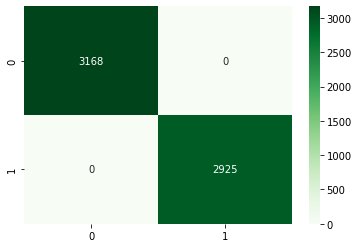

In [211]:
pca_confmat = confusion_matrix(y_train, PKNC_Train_preds)
print('PCA KNN matrix: \n')
sns.heatmap(pca_confmat, annot=True, fmt = 'g', cmap='Greens');

- For KNeighbors the pca pipeline was the fastest model that took 2.04s. This was 13ms faster than the non pca pipline. 

# In my opinion I recomend using the Logistic Regression model. The reasons being that it has really good accuracy scors and compaired to the other models, is efficient on time and accuracy. 